<a href="https://colab.research.google.com/github/samarkinav/Test-MGNT/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%82%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

## Чтение данных

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/samarkinav/Test-MGNT/main/data_classification_for_task.csv?token=ARDNBEFAYDOY6BYOEYCUVX3BR2LGU')

In [3]:
df.head()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         303 non-null    int64  
 1   GENDER      303 non-null    int64  
 2   FEATURE_1   303 non-null    int64  
 3   FEATURE_2   303 non-null    int64  
 4   FEATURE_3   303 non-null    int64  
 5   FEATURE_4   303 non-null    int64  
 6   FEATURE_5   303 non-null    int64  
 7   FEATURE_6   303 non-null    int64  
 8   FEATURE_7   303 non-null    int64  
 9   FEATURE_8   303 non-null    float64
 10  FEATURE_9   303 non-null    int64  
 11  FEATURE_10  303 non-null    int64  
 12  FEATURE_11  303 non-null    int64  
 13  TARGET      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
corr_mat = df.corr()
corr_mat

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
AGE,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
GENDER,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
FEATURE_1,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
FEATURE_2,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
FEATURE_3,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
FEATURE_4,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
FEATURE_5,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
FEATURE_6,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
FEATURE_7,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
FEATURE_8,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


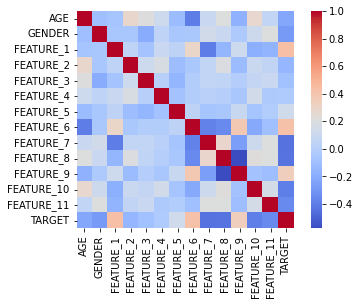

In [7]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Посмотрим, какие признаки сильнее всего коррелируют между собой:

In [8]:
df_corr = df.drop(['TARGET'], axis=1)
df_corr.corr().where(np.triu(abs(df_corr.corr()) > 0.3, k=1)).stack().sort_values(ascending=False)

FEATURE_6  FEATURE_9    0.386784
           FEATURE_8   -0.344187
           FEATURE_7   -0.378812
FEATURE_1  FEATURE_7   -0.394280
AGE        FEATURE_6   -0.398522
FEATURE_8  FEATURE_9   -0.577537
dtype: float64

Посмотрим, какие признаки меньше всего коррелируют с целевой переменной:

In [9]:
df_corr2 = corr_mat.iloc[:, -1]
df_corr2[abs(df_corr2)<0.2]

FEATURE_2   -0.144931
FEATURE_3   -0.085239
FEATURE_4   -0.028046
FEATURE_5    0.137230
Name: TARGET, dtype: float64

In [10]:
df.isna().sum()

AGE           0
GENDER        0
FEATURE_1     0
FEATURE_2     0
FEATURE_3     0
FEATURE_4     0
FEATURE_5     0
FEATURE_6     0
FEATURE_7     0
FEATURE_8     0
FEATURE_9     0
FEATURE_10    0
FEATURE_11    0
TARGET        0
dtype: int64

Пропущенных значений нет

In [11]:
df.TARGET.nunique()

2

In [12]:
df.TARGET.value_counts().reset_index()

,index,TARGET
0,1,165
1,0,138


Классы сбалансированны

In [13]:
df = pd.get_dummies(df, prefix='GENDER', columns=['GENDER'])

In [14]:
df

,AGE,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET,GENDER_0,GENDER_1
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0
299,45,3,110,264,0,1,132,0,1.2,1,0,3,0,0,1
300,68,0,144,193,1,1,141,0,3.4,1,2,3,0,0,1
301,57,0,130,131,0,1,115,1,1.2,1,1,3,0,0,1


In [15]:
X = df.drop(['TARGET'], axis=1)
y = df.TARGET

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
print(X_train.shape[0],X_test.shape[0])

212 91


In [18]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [45]:
lg = lgb.LGBMClassifier(silent=False)
parametrs= {"n_estimators":  range(10,200,5)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=15, scoring='f1')
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

30


In [46]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'binary', 'num_class':1, 'learning_rate':0.06}
num_round = best_n_estimators
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data])
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's binary_logloss: 0.657299
[2]	valid_0's binary_logloss: 0.630344
[3]	valid_0's binary_logloss: 0.611916
[4]	valid_0's binary_logloss: 0.592184
[5]	valid_0's binary_logloss: 0.576878
[6]	valid_0's binary_logloss: 0.557437
[7]	valid_0's binary_logloss: 0.54231
[8]	valid_0's binary_logloss: 0.53176
[9]	valid_0's binary_logloss: 0.520735
[10]	valid_0's binary_logloss: 0.508734
[11]	valid_0's binary_logloss: 0.500463
[12]	valid_0's binary_logloss: 0.488651
[13]	valid_0's binary_logloss: 0.480982
[14]	valid_0's binary_logloss: 0.475397
[15]	valid_0's binary_logloss: 0.467269
[16]	valid_0's binary_logloss: 0.461788
[17]	valid_0's binary_logloss: 0.452892
[18]	valid_0's binary_logloss: 0.448235
[19]	valid_0's binary_logloss: 0.442241
[20]	valid_0's binary_logloss: 0.43779
[21]	valid_0's binary_logloss: 0.433318
[22]	valid_0's binary_logloss: 0.428837
[23]	valid_0's binary_logloss: 0.423335
[24]	valid_0's binary_logloss: 0.419784
[25]	valid_0's binary_logloss: 0.415485
[26]	valid_0

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

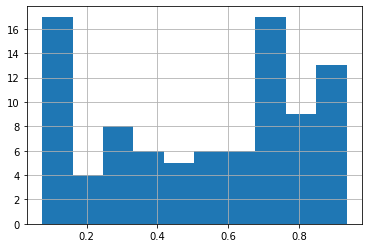

In [48]:
pd.Series(y_test_predict_lgbm).hist()

In [49]:
binary_y_test_predict = np.where(y_test_predict_lgbm>0.5, 1, 0)

In [50]:
print(classification_report(y_test, binary_y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.83      0.84      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [51]:
f1_score(y_test, binary_y_test_predict)

0.8349514563106797

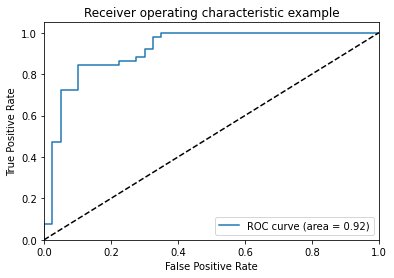

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_lgbm)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [53]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

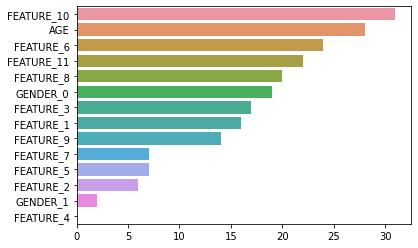

In [54]:
sns.barplot(y=importances.index, x=importances)
pass

Исключим признак 4, он мало коррелирует с откликом и не вносит вклад в нашу модель

In [55]:
X = df.drop(['TARGET', 'FEATURE_4'], axis=1)
y = df.TARGET

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
print(X_train.shape[0], X_test.shape[0])

212 91


In [57]:
lg = lgb.LGBMClassifier(silent=False)
parametrs= {"n_estimators":  range(10,200,5)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=15, scoring='f1')
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

30


In [58]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective': 'binary','num_class':1, 'learning_rate':0.06}
num_round = best_n_estimators
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data])
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's binary_logloss: 0.657299
[2]	valid_0's binary_logloss: 0.630344
[3]	valid_0's binary_logloss: 0.611916
[4]	valid_0's binary_logloss: 0.592184
[5]	valid_0's binary_logloss: 0.576878
[6]	valid_0's binary_logloss: 0.557437
[7]	valid_0's binary_logloss: 0.54231
[8]	valid_0's binary_logloss: 0.53176
[9]	valid_0's binary_logloss: 0.520735
[10]	valid_0's binary_logloss: 0.508734
[11]	valid_0's binary_logloss: 0.500463
[12]	valid_0's binary_logloss: 0.488651
[13]	valid_0's binary_logloss: 0.480982
[14]	valid_0's binary_logloss: 0.475397
[15]	valid_0's binary_logloss: 0.467269
[16]	valid_0's binary_logloss: 0.461788
[17]	valid_0's binary_logloss: 0.452892
[18]	valid_0's binary_logloss: 0.448235
[19]	valid_0's binary_logloss: 0.442241
[20]	valid_0's binary_logloss: 0.43779
[21]	valid_0's binary_logloss: 0.433318
[22]	valid_0's binary_logloss: 0.428837
[23]	valid_0's binary_logloss: 0.423335
[24]	valid_0's binary_logloss: 0.419784
[25]	valid_0's binary_logloss: 0.415485
[26]	valid_0

In [59]:
binary_y_test_predict = np.where(y_test_predict_lgbm>0.5, 1, 0)

In [60]:
print(classification_report(y_test, binary_y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.83      0.84      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [61]:
f1_score(y_test, binary_y_test_predict)

0.8349514563106797

F1 остался прежним. Удалим еще и признак 7, потому что он коррелирует с признаком 1

In [62]:
X = df.drop(['TARGET', 'FEATURE_4', 'FEATURE_7'], axis=1)
y = df.TARGET

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
print(X_train.shape[0], X_test.shape[0])

212 91


In [64]:
lg = lgb.LGBMClassifier(silent=False)
parametrs= {"n_estimators":  range(10,200,5)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=15, scoring='f1')
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

35


In [65]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective': 'binary','num_class':1, 'learning_rate':0.06}
num_round = best_n_estimators
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data])
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's binary_logloss: 0.657299
[2]	valid_0's binary_logloss: 0.630344
[3]	valid_0's binary_logloss: 0.611916
[4]	valid_0's binary_logloss: 0.592184
[5]	valid_0's binary_logloss: 0.576878
[6]	valid_0's binary_logloss: 0.557437
[7]	valid_0's binary_logloss: 0.54231
[8]	valid_0's binary_logloss: 0.530314
[9]	valid_0's binary_logloss: 0.515241
[10]	valid_0's binary_logloss: 0.505103
[11]	valid_0's binary_logloss: 0.49428
[12]	valid_0's binary_logloss: 0.484987
[13]	valid_0's binary_logloss: 0.477846
[14]	valid_0's binary_logloss: 0.467284
[15]	valid_0's binary_logloss: 0.461727
[16]	valid_0's binary_logloss: 0.454029
[17]	valid_0's binary_logloss: 0.449031
[18]	valid_0's binary_logloss: 0.442513
[19]	valid_0's binary_logloss: 0.437767
[20]	valid_0's binary_logloss: 0.433978
[21]	valid_0's binary_logloss: 0.430794
[22]	valid_0's binary_logloss: 0.423348
[23]	valid_0's binary_logloss: 0.419003
[24]	valid_0's binary_logloss: 0.416691
[25]	valid_0's binary_logloss: 0.417297
[26]	valid_

In [66]:
binary_y_test_predict = np.where(y_test_predict_lgbm>0.5, 1, 0)

In [74]:
f1_score(y_test, binary_y_test_predict)

0.8461538461538461

Удаление признаков повышает f1 score. 

In [82]:
X = df.drop(['TARGET', 'FEATURE_4', 'FEATURE_7', 'GENDER_1', 'FEATURE_2', 'FEATURE_5'], axis=1)
y = df.TARGET

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
print(X_train.shape[0], X_test.shape[0])

212 91


In [84]:
lg = lgb.LGBMClassifier(silent=False)
parametrs= {"n_estimators":  range(10,200,5)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=15, scoring='f1')
grid_search_cv.fit(X_train,y_train)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

30


In [85]:
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective': 'binary','num_class':1, 'learning_rate':0.06}
num_round = best_n_estimators
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data])
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's binary_logloss: 0.656954
[2]	valid_0's binary_logloss: 0.629732
[3]	valid_0's binary_logloss: 0.611425
[4]	valid_0's binary_logloss: 0.591381
[5]	valid_0's binary_logloss: 0.576214
[6]	valid_0's binary_logloss: 0.556813
[7]	valid_0's binary_logloss: 0.541633
[8]	valid_0's binary_logloss: 0.529769
[9]	valid_0's binary_logloss: 0.514552
[10]	valid_0's binary_logloss: 0.504554
[11]	valid_0's binary_logloss: 0.493837
[12]	valid_0's binary_logloss: 0.484072
[13]	valid_0's binary_logloss: 0.475908
[14]	valid_0's binary_logloss: 0.467799
[15]	valid_0's binary_logloss: 0.462484
[16]	valid_0's binary_logloss: 0.45322
[17]	valid_0's binary_logloss: 0.448024
[18]	valid_0's binary_logloss: 0.443695
[19]	valid_0's binary_logloss: 0.439748
[20]	valid_0's binary_logloss: 0.434258
[21]	valid_0's binary_logloss: 0.426626
[22]	valid_0's binary_logloss: 0.425214
[23]	valid_0's binary_logloss: 0.424333
[24]	valid_0's binary_logloss: 0.417779
[25]	valid_0's binary_logloss: 0.415139
[26]	valid

In [86]:
binary_y_test_predict = np.where(y_test_predict_lgbm>0.5, 1, 0)

In [87]:
f1_score(y_test, binary_y_test_predict)

0.8235294117647058

Остановимся на удалении только признаокв 4 и 7. Попробуем сбалансировать классы:

In [88]:
df.head()

,AGE,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET,GENDER_0,GENDER_1
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0


Урежем мажорирующий класс:

In [90]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_miss, y_train_miss = nm.fit_resample(X_train, y_train)

In [91]:
print(sum(y_train_miss==0),sum(y_train_miss==1))

98 98


In [92]:
lg = lgb.LGBMClassifier(silent=False)
parametrs = {"n_estimators":  range(10,200,10)}
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=parametrs, cv=15, scoring='f1')
grid_search.fit(X_train_miss,y_train_miss)
best_n_estimators = grid_search.best_estimator_.n_estimators
print(best_n_estimators)

40


In [93]:
train_data = lgb.Dataset(X_train_miss, label=y_train_miss)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'binary','num_class':1, 'learning_rate':0.06}
num_round = best_n_estimators
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data])
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's binary_logloss: 0.664311
[2]	valid_0's binary_logloss: 0.642478
[3]	valid_0's binary_logloss: 0.618765
[4]	valid_0's binary_logloss: 0.601828
[5]	valid_0's binary_logloss: 0.582798
[6]	valid_0's binary_logloss: 0.568686
[7]	valid_0's binary_logloss: 0.553934
[8]	valid_0's binary_logloss: 0.539562
[9]	valid_0's binary_logloss: 0.530282
[10]	valid_0's binary_logloss: 0.51769
[11]	valid_0's binary_logloss: 0.509953
[12]	valid_0's binary_logloss: 0.497992
[13]	valid_0's binary_logloss: 0.490682
[14]	valid_0's binary_logloss: 0.484439
[15]	valid_0's binary_logloss: 0.478731
[16]	valid_0's binary_logloss: 0.470157
[17]	valid_0's binary_logloss: 0.46572
[18]	valid_0's binary_logloss: 0.45949
[19]	valid_0's binary_logloss: 0.451844
[20]	valid_0's binary_logloss: 0.446554
[21]	valid_0's binary_logloss: 0.442961
[22]	valid_0's binary_logloss: 0.439935
[23]	valid_0's binary_logloss: 0.43612
[24]	valid_0's binary_logloss: 0.430356
[25]	valid_0's binary_logloss: 0.426782
[26]	valid_0'

In [94]:
binary_y_test_predict = np.where(y_test_predict_lgbm>0.5, 1, 0)

In [95]:
f1_score(y_test, binary_y_test_predict)

0.8316831683168315

Дополним миноритарный класс:

In [96]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=30)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [97]:
print(sum(y_train_sm==0),sum(y_train_sm==1))

114 114


In [98]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"n_estimators":  range(10,200,10)}
grid_search_cv = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv=15, scoring='f1')
grid_search_cv.fit(X_train_sm,y_train_sm)
best_n_estimators = grid_search_cv.best_estimator_.n_estimators
print(best_n_estimators)

40


In [99]:
train_data = lgb.Dataset(X_train_sm, label=y_train_sm)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves':31, 'objective':'binary','num_class':1, 'learning_rate':0.06}
num_round = best_n_estimators
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data])
y_test_predict_lgbm = bst.predict(X_test)

[1]	valid_0's binary_logloss: 0.668683
[2]	valid_0's binary_logloss: 0.647366
[3]	valid_0's binary_logloss: 0.622716
[4]	valid_0's binary_logloss: 0.605628
[5]	valid_0's binary_logloss: 0.589884
[6]	valid_0's binary_logloss: 0.575886
[7]	valid_0's binary_logloss: 0.558312
[8]	valid_0's binary_logloss: 0.544847
[9]	valid_0's binary_logloss: 0.533996
[10]	valid_0's binary_logloss: 0.521333
[11]	valid_0's binary_logloss: 0.514282
[12]	valid_0's binary_logloss: 0.505571
[13]	valid_0's binary_logloss: 0.494312
[14]	valid_0's binary_logloss: 0.488579
[15]	valid_0's binary_logloss: 0.484485
[16]	valid_0's binary_logloss: 0.48106
[17]	valid_0's binary_logloss: 0.474688
[18]	valid_0's binary_logloss: 0.466256
[19]	valid_0's binary_logloss: 0.462292
[20]	valid_0's binary_logloss: 0.455873
[21]	valid_0's binary_logloss: 0.44868
[22]	valid_0's binary_logloss: 0.44251
[23]	valid_0's binary_logloss: 0.436183
[24]	valid_0's binary_logloss: 0.432581
[25]	valid_0's binary_logloss: 0.427499
[26]	valid_0

In [100]:
binary_y_test_predict = np.where(y_test_predict_lgbm>0.5, 1, 0)

In [101]:
f1_score(y_test, binary_y_test_predict)

0.8155339805825242

Балансировка классов в обучающей выборке только понизила f1 score. В итоге лучшая модель получилась со всеми фичами кроме 4 и 7